# `Data Balancing`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.sample(4)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
165325,117357.0,-1.385973,1.282396,0.950909,-1.178334,0.518352,-0.218339,0.623430,-0.201999,0.775099,...,-0.220933,-0.411647,-0.124800,-0.516279,-0.266093,-0.341274,-0.375341,0.108164,2.31,0
116396,74258.0,-0.642920,1.099400,1.725971,-0.087426,0.101578,-0.577116,0.896401,-0.203257,-0.187904,...,-0.254361,-0.360850,0.017190,0.397192,-0.260483,0.054977,0.235970,-0.041120,14.98,0
264832,161613.0,2.035939,-0.318733,-3.081794,-0.512187,2.718176,3.167097,-0.110019,0.658140,0.207119,...,-0.021111,-0.002357,0.094771,0.751915,0.246870,0.398861,-0.067212,-0.077831,21.32,0
196366,131472.0,-2.677121,1.042634,-1.359925,-2.069566,-1.199482,0.398575,-0.968390,1.579101,-1.506365,...,0.269585,0.244433,-0.234555,-0.166461,1.087018,-0.054428,-1.034985,-0.497919,73.55,0


In [4]:
df['Class'].value_counts()/len(df)*100

Class
0    99.827251
1     0.172749
Name: count, dtype: float64

<Axes: xlabel='Class', ylabel='count'>

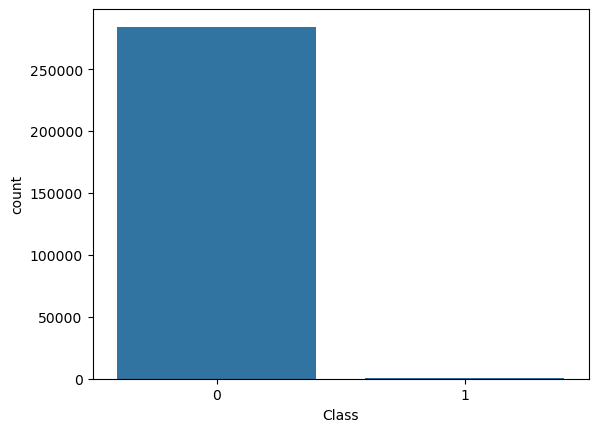

In [5]:
sns.countplot(data=df, x='Class', legend=True)

# Handle Imbalance Data

In [6]:
import imblearn

In [7]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
x.sample(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
46853,42957.0,-3.434908,-1.335113,0.387497,-2.087460,-1.109935,-1.294444,0.087575,0.255596,0.109332,...,-0.434131,-0.636449,-0.677560,-0.284187,0.473587,-0.288518,0.921562,0.136693,-0.083210,191.15
75242,55966.0,-1.032973,0.286041,0.825081,-1.678015,2.124738,3.684584,-0.131394,0.990692,-0.240249,...,0.011466,-0.007562,-0.266134,-0.282445,1.025607,0.305110,0.318110,-0.061782,0.030641,65.78
174158,121799.0,1.867973,-0.924684,0.122297,0.054521,-1.242409,0.114805,-1.275009,0.338148,1.813929,...,-0.189983,0.262613,0.779741,0.141090,-0.418693,-0.480943,0.073411,0.025617,-0.038644,45.98


In [9]:
y.sample(3)

86132     0
86342     0
252943    0
Name: Class, dtype: int64

In [10]:
y.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

## Method 1: Random Undersampling

In [11]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler()
xunder, yunder = under.fit_resample(x,y)

In [12]:
yunder.value_counts()

Class
0    492
1    492
Name: count, dtype: int64

## Method 2: Random Oversampling

In [13]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler()
xover, yover = over.fit_resample(x,y)

In [14]:
yover.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

## Method 3: SMOTE

In [15]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
xsmote, ysmote = smt.fit_resample(x,y)

In [16]:
ysmote.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

# Multiclass

In [17]:
df = pd.read_csv('synthetic_dataset.csv')
df.sample(4)

,Feature1,Feature2,Target
4880,1.260374,0.190613,2
2414,0.470048,-1.245067,2
1799,1.348440,0.364372,2
3139,0.556387,-1.701943,2


<Axes: xlabel='Target', ylabel='count'>

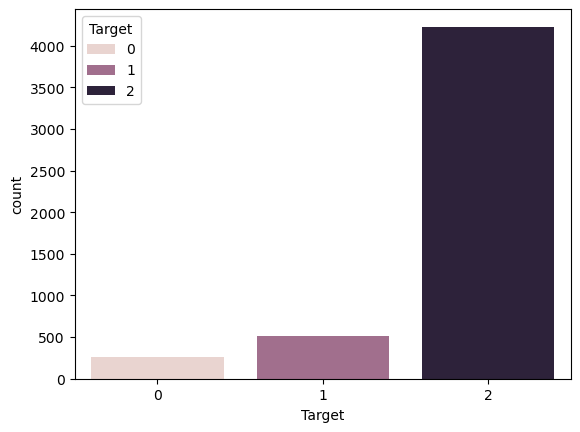

In [18]:
sns.countplot(data=df, x='Target', hue='Target')

In [20]:
x = df.drop(columns='Target')
y = df[['Target']].values

In [22]:
xsmote, ysmote = smt.fit_resample(x,y)

<Axes: ylabel='count'>

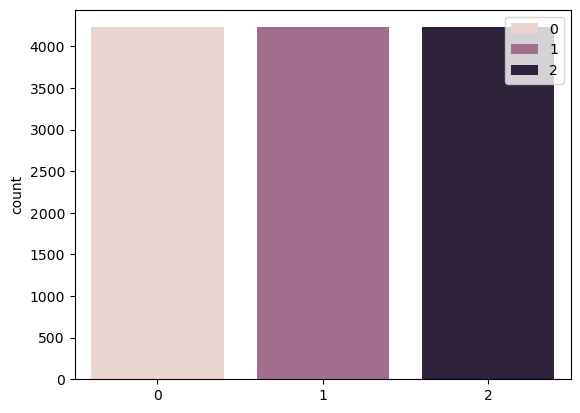

In [25]:
sns.countplot(x=ysmote, hue=ysmote)